In [1]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 15.4 MB/s 
     |████████████████████████████████| 19.2 MB 64.4 MB/s 
     |████████████████████████████████| 240 kB 45.4 MB/s 
     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 106 kB 30.7 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 49 kB 4.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.6 MB/s 
     |████████████████████████████████| 943 kB 46.2 MB/s 
     |████████████████████████████████| 4.1 MB 32.4 MB/s 
     |████████████████████████████████| 1.9 MB 32.8 MB/s 
     |████████████████████████████████| 112 kB 73.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.1-py3-none-any.whl size=12224 sha256=d1727604d79006619b9619c1e951baf0e107e9c04545931e30fcd0692a844416
  Stored in directory: /root/.cache/pip/wheels/5a/65/57/e93

In [2]:
pip install qiskit[optimization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 159 kB 13.1 MB/s 
     |████████████████████████████████| 610 kB 68.5 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=761ceffa2fa828d257430af9153277cbb486b5966f8485baeaf71ec730346e86
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex


In [3]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
from geopy import distance 

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

In [23]:
points= [[25.655687,-100.2109921],
        [25.714977,	-100.219412],
        [25.7839939,-100.2291192],
        [25.7775699,-100.3326912],
        [25.763793,	-100.322384],
        [25.7397093,-100.3290094],
        [25.7261597,-100.3563217],
        [25.704833,	-100.351074],
        [25.680895,	-100.352126],
        [25.645349,	-100.293527],
        [25.6826481,-100.2978311],
        [25.704144,	-100.30969],
        [25.665585,	-100.267048],
        [25.662981,	-100.242673]]

# "geograghic" distance matrix

n = len(points)  # Number of nodes in graph
W = np.zeros((n,n))
connections = [[0,1],[0,13],[1,2],[2,3],[3,4],
               [4,5],[4,13],[5,6],[5,11],[6,7],
               [7,8],[7,11],[10,11],[8,9],[8,10],
               [9,10],[9,12],[12,13]]

edges_list = list()
for edge in connections:
  dist = distance.distance(points[edge[0]], points[edge[1]]).km
  W[edge[0],edge[1]] = dist
  edges_list.append([edge[0], edge[1], np.round(dist,3)])

W = W+np.transpose(W)

# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(W,2))

Distance Matrix is:

[[ 0.    6.62  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    3.28]
 [ 6.62  0.    7.71  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    7.71  0.   10.41  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.   10.41  0.    1.84  0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    1.84  0.    2.75  0.    0.    0.    0.    0.    0.
   0.   13.74]
 [ 0.    0.    0.    0.    2.75  0.    3.12  0.    0.    0.    0.    4.39
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    3.12  0.    2.42  0.    0.    0.    0.
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    2.42  0.    2.65  0.    0.    4.15
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    2.65  0.    7.08  5.45  0.
   0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    7.08  0.    4.15  0.
   3.48  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    5.45  4.15  0.    2.66
   0.    0.  ]
 [ 0.    0.    0

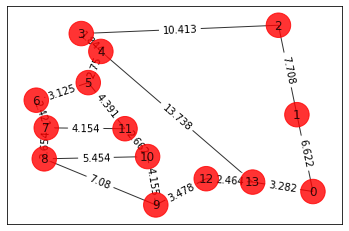

In [24]:
pos = dict().fromkeys(np.arange(n))
for count in range(n):
  pos[count] = np.array([points[count][1],points[count][0]])#pos[count] = np.array(points[count])

# Generating a graph of 4 nodes
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edges_list)

colors = ["r" for node in G.nodes()]

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

energy: -33.091678248655576
time: 893.0848486423492
max-cut objective: -77.28838268475891
solution: [1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
solution objective: 78.01143071351117


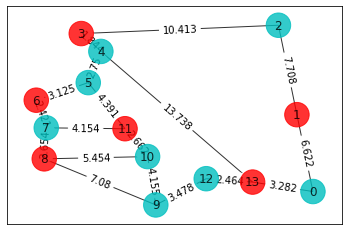

In [26]:
max_cut = Maxcut(W)
qp = max_cut.to_quadratic_program()
qubitOp, offset = qp.to_ising()
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("aer_simulator_statevector")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
# construct VQE
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

# run VQE
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

TSP


In [30]:
num_qubits = n**2

adjacency_mat = np.zeros((n,n))
edges_list_tsp = list()
for row in range(n):
  for col in range(n):
    if row < col:
      dist = distance.distance(points[row], points[col]).km
      adjacency_mat[row, col] = dist
      edges_list_tsp.append([row, col, dist])

G_tsp = nx.Graph()
G_tsp.add_nodes_from(np.arange(0, n, 1))
# tuple is (i,j,weight) where (i,j) is the edge
G_tsp.add_weighted_edges_from(edges_list_tsp)

colors = ["r" for node in G_tsp.nodes()]

tsp = Tsp(G_tsp)
qp = tsp.to_quadratic_program()
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

In [ ]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("aer_simulator_statevector")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)